In [1]:
import gym
import numpy as np
import ECM_dVRL_v01
import matplotlib.pyplot as plt

In [2]:
env = gym.make('ECM-v0')

In [3]:
[c_x, c_y] = env.get_centroid()

In [4]:
type(c_x)

numpy.float64

In [5]:
env.reset()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [4]:
env.step(np.zeros(4))

({'observation': array([-0.92000002,  0.05      ,  0.        ,  0.        ]),
  'achieved_goal': array([274, 225]),
  'desired_goal': array([270., 216.])},
 -32.0,
 False,
 {'success': False, 'reward': -32.0})

In [5]:
rgb_img_left, rgb_img_right = env.ecm.getStereoImagePairs()
depth_img_left, depth_image_right = env.ecm.getDepthImagePairs()

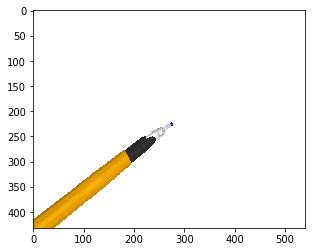

In [6]:
plt.imshow(rgb_img_left)
plt.show()

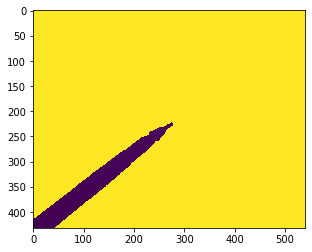

In [7]:
plt.imshow(depth_img_left)
plt.show()

In [8]:
env.psm.marker.get_position(env.ecm.left_cam)

array([-0.00135398, -0.00329018,  0.15271795])

In [9]:
w, h = rgb_img_left.shape[0], rgb_img_left.shape[1]

In [10]:
FOV = np.radians(env.ecm.left_cam.get_perspective_angle())

In [11]:
f = h/(2.0 * np.tan(FOV/2.0))

In [12]:
u, v = env.get_centroid()

In [13]:
z = depth_img_left[u, v]

In [14]:
x = (z/f) * (u - (w/2.0))
y = (z/f) * (v - (h/2.0))
x, y, z

(0.01714796523954711, -0.01330445578930379, 0.13826396)

In [23]:
env.close()